In [58]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# EDA

In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Checking null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From above we can see that the null values are present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_term and credit_History, which we will fix.

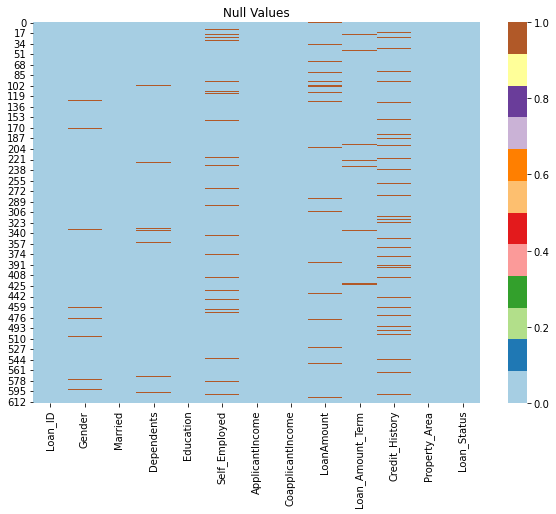

In [10]:
#visualising the data
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

In [11]:
#checking for unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Checking the target class

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
# Checking value count of all the columns present in the dataset.
for i in df.columns:
    print(df[i].value_counts())
    print('********************')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
********************
Male      489
Female    112
Name: Gender, dtype: int64
********************
Yes    398
No     213
Name: Married, dtype: int64
********************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
********************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
********************
No     500
Yes     82
Name: Self_Employed, dtype: int64
********************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
********************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype

We can see that all values present in the loan ID column are Unique, which is not useful for us.
In column named Coapplicant Income-  there are 287 rows with 0.0 values, which we will fix , otherwise it will affect our model performance.

# Dropping columns

In [16]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [17]:
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


We can see that skewness is present in all numeric columns. There are outliers in columns ApplicantIncome,CoapplicantIncome, LoanAmount, Loan_Amount_Term and the standard deviation is high

# Checking Skewness

In [18]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [20]:
#Using mean to replace null values
df["CoapplicantIncome"].replace(0,df["CoapplicantIncome"].mean(),inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


In [21]:
# Using median to replace NaN values in LoanAmount column
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


In [22]:
#Using mode to replace nan/null values from other categorial columns
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [23]:
#checking again for null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values found

# Data Visualization

In [24]:
#UniVariate Analysis:
category=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        category.append(i)
    else:
        integer.append(i)
print(category)
print(integer)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


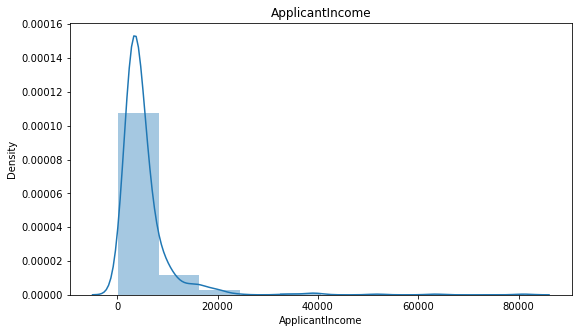

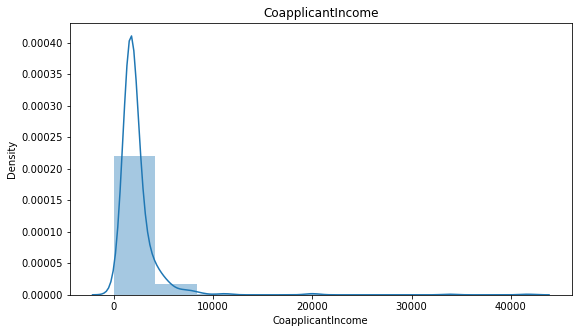

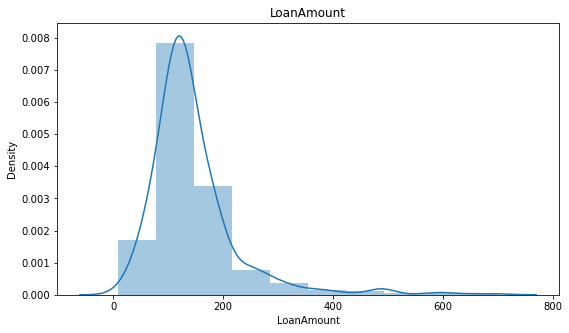

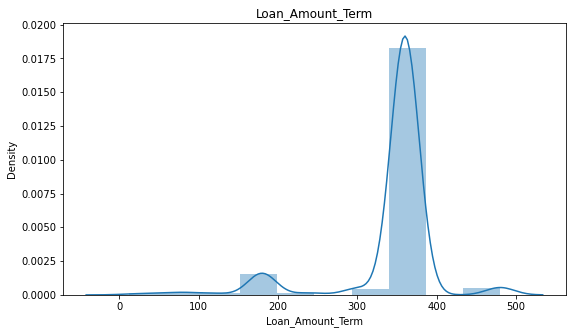

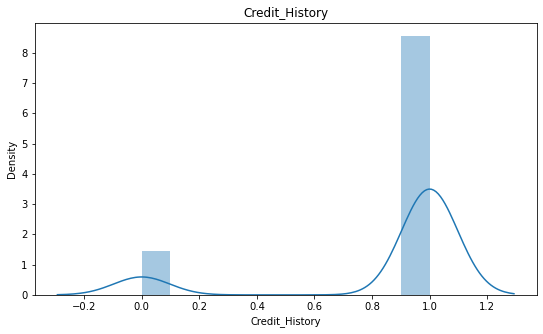

In [25]:
# Lets visualize all numerical columns using distribution plot.
for i in df[integer]:
    plt.figure(figsize=(9,5))
    sns.distplot(df[i], bins=10)
    plt.title(i)
    plt.show()

Skewness is present in all Numerical columns

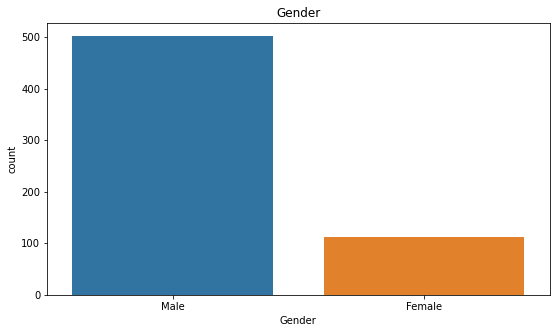

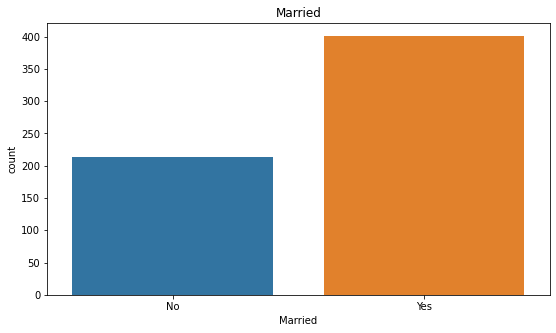

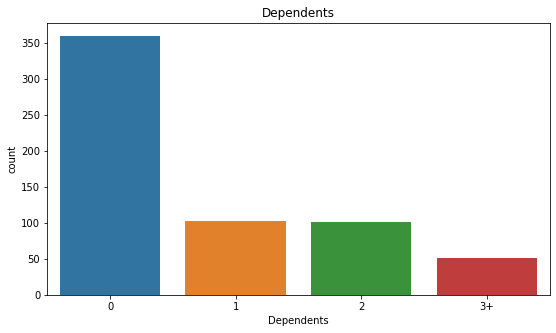

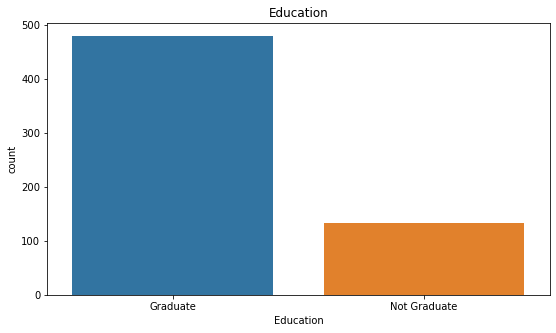

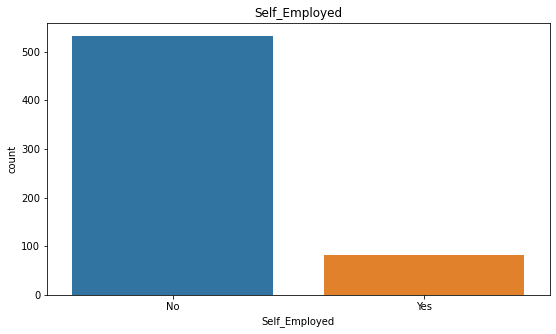

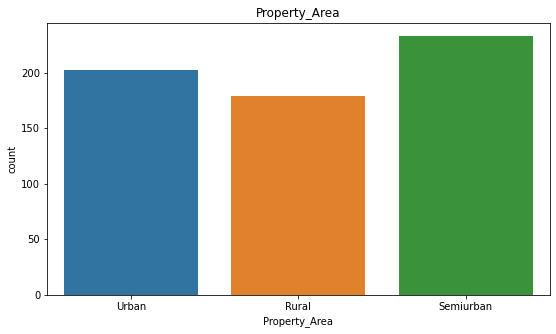

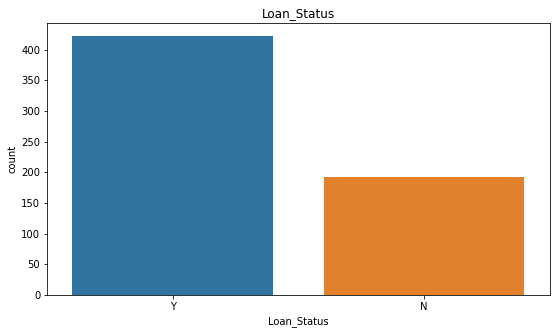

In [26]:
for i in df[category]:
    plt.figure(figsize=(9,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

# Observation
-  From above we can say that most of the applicants are Male who are Married but with 0 dependents.
-  The education of the applicants are minimum Graduate.
-  Most of the applicants are salaried.
-  Number of properties are from semiurban areas and than urban
-  The least properties are in Rural Area
-  Loan_Status of most the applicants are elidgible for loan.

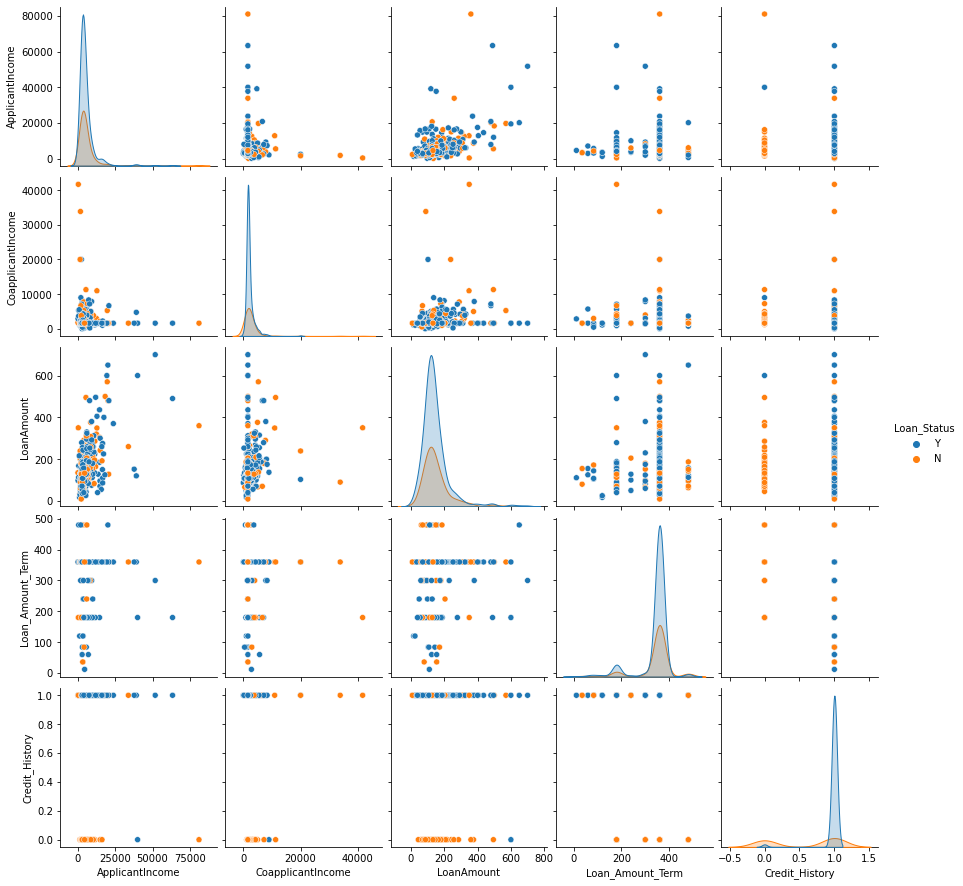

In [28]:
# Multivariate Analysis:
sns.pairplot(df,hue="Loan_Status")

# Checking Correlation

In [29]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.050734,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.050734,1.000000,0.206453,-0.073210,0.008339
LoanAmount,0.565181,0.206453,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.073210,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.008339,-0.000607,-0.004705,1.000000


We can see that there is positive correlation between applicantIncome and LoanAmount

<AxesSubplot:>

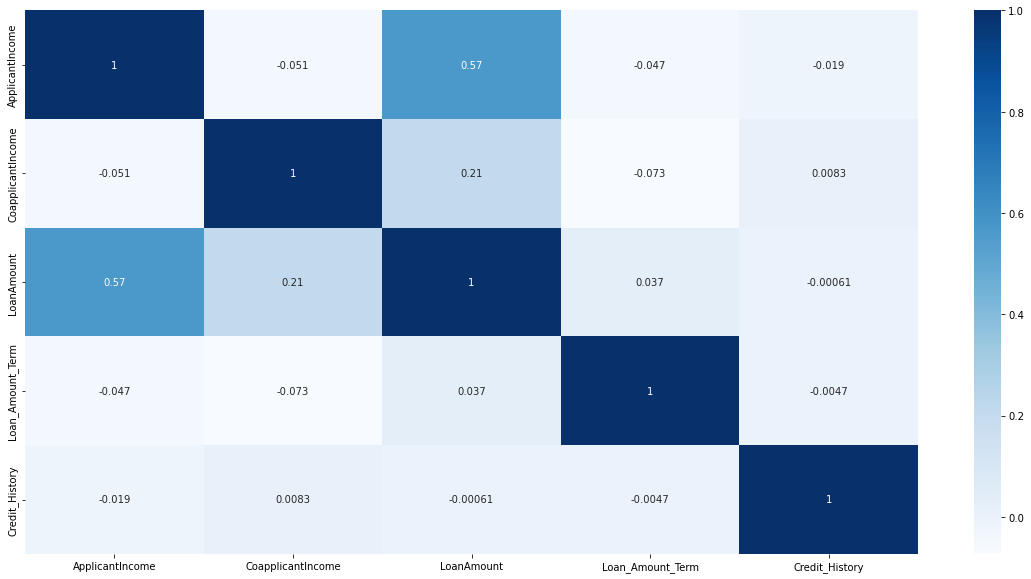

In [30]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

The independent variables are positively as well as negatively correlated with Target variable.

# Removing Outliers

Above we have seen that we have ouliers in the columns ApplicantIncome,CoapplicantIncome and LoanAmount. So now we will remove it.

In [31]:
#creating list of columns
out=df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [33]:
z=np.abs(zscore(out))
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1621.245798,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,1621.245798,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.000000,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,1621.245798,187.0,360.0,1.0,Urban,Y


In [34]:
# checking the shape of new dataset
df1.shape

(589, 12)

In [35]:
# Lets check skewness in new dataset
df1.skew()

ApplicantIncome      2.164762
CoapplicantIncome    2.554282
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

# Label Encoding

In [36]:
# lets separate category columns in new dataset
category1=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        category1.append(i)
print(category1)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [38]:
le=LabelEncoder()
df1[category1]=df1[category1].apply(le.fit_transform)
df1[category1].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [39]:
# checking the correlation in all the columns
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.027728,0.109671,0.150043,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.006164,0.084221,0.159808,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.078305,-0.059620,0.132766,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.160966,-0.102238,-0.151997,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.251370,0.004191,0.112422,-0.053868,-0.012954,-0.030248,-0.016617
ApplicantIncome,0.027728,-0.006164,0.078305,-0.160966,0.251370,1.000000,-0.077304,0.440055,-0.020069,0.034203,-0.006917,-0.005043
CoapplicantIncome,0.109671,0.084221,-0.059620,-0.102238,0.004191,-0.077304,1.000000,0.351382,-0.066603,-0.026180,-0.082809,0.000764
LoanAmount,0.150043,0.159808,0.132766,-0.151997,0.112422,0.440055,0.351382,1.000000,0.075801,0.004538,-0.084519,-0.037704
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.020069,-0.066603,0.075801,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.034203,-0.026180,0.004538,-0.013960,1.000000,-0.005694,0.555908


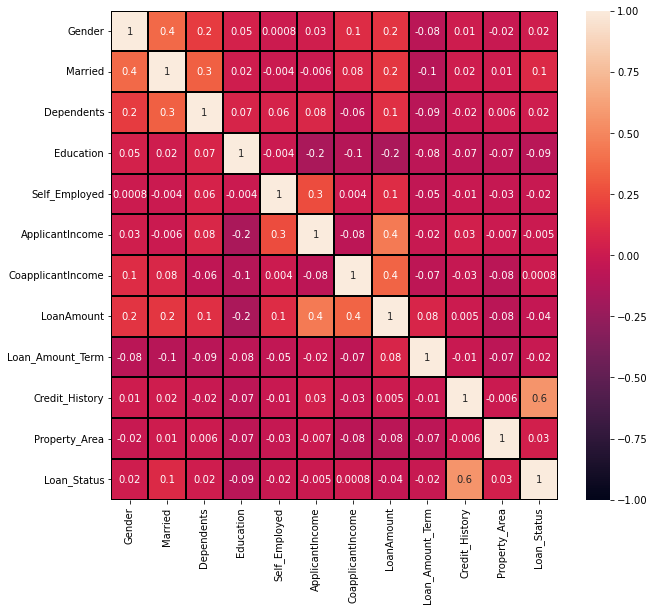

In [40]:
# visualising correlation in all the columns using heatmap
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10})
plt.yticks(rotation=0);

We can see that our Target column Loan_status have strong correlation with Credit_history

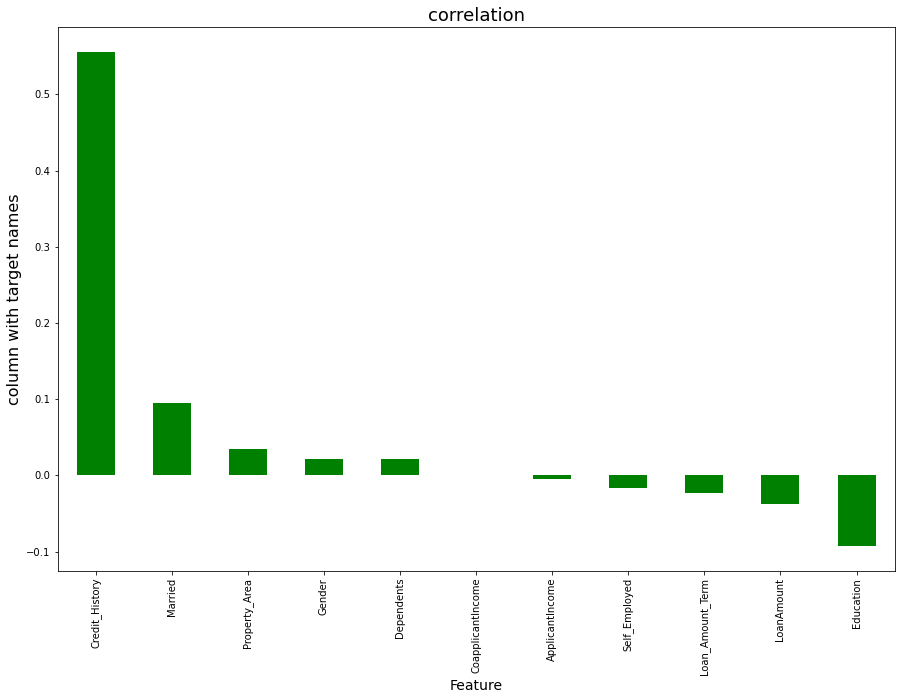

In [41]:
plt.figure(figsize=(15,10))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=18)
plt.show()

We can clearly see that ApplicantIncome and CoapplicantIncome is negatively correlated to our target column loan_status

# Training and scaling the data

In [42]:
# lets assing features to x and target variable to y
x1=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

In [43]:
# Scaling the data
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

# Random State Selection

In [45]:
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best accuracy is ",max_acc," on Random_state ",max_rs)

Best accuracy is  0.864406779661017  on Random_state  31


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=183)

# Model Selection

In [48]:
#KNN Classifier
knn=KNN()
knn.fit(x_train,y_train)
predk=knn.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predk))
print("Confusion Matrix: ", confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))

R2_Score:  0.751412429378531
Confusion Matrix:  [[ 27  29]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        56
           1       0.79      0.88      0.83       121

    accuracy                           0.75       177
   macro avg       0.71      0.68      0.69       177
weighted avg       0.74      0.75      0.74       177



In [61]:
sv=SVC()
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predsv))
print("Confusion Matrix: ", confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

R2_Score:  0.8192090395480226
Confusion Matrix:  [[ 26  30]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.93      0.46      0.62        56
           1       0.80      0.98      0.88       121

    accuracy                           0.82       177
   macro avg       0.86      0.72      0.75       177
weighted avg       0.84      0.82      0.80       177



In [50]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,preddtc))
print("Confusion Matrix: ", confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

R2_Score:  0.711864406779661
Confusion Matrix:  [[31 25]
 [26 95]]
              precision    recall  f1-score   support

           0       0.54      0.55      0.55        56
           1       0.79      0.79      0.79       121

    accuracy                           0.71       177
   macro avg       0.67      0.67      0.67       177
weighted avg       0.71      0.71      0.71       177



In [51]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("R2_Score: ",accuracy_score(y_test,predrfc))
print("Confusion Matrix: ", confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

R2_Score:  0.7909604519774012
Confusion Matrix:  [[ 28  28]
 [  9 112]]
              precision    recall  f1-score   support

           0       0.76      0.50      0.60        56
           1       0.80      0.93      0.86       121

    accuracy                           0.79       177
   macro avg       0.78      0.71      0.73       177
weighted avg       0.79      0.79      0.78       177



# Cross Validation Score

In [52]:
# Cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7860785165869911


In [53]:
# Cv score of SVC
print(cross_val_score(sv,x,y,cv=5).mean())

0.8149645081848472


In [54]:
# Cv score of DTC
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7267130233231928


In [55]:
# Cv score of RFC
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7979718962769811


# Conclusion:
Selecting SVC as our final model and tuning it using Hyper Parameter.

# Hyper Parameter Tuning:

In [62]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [63]:
gcv=GridSearchCV(SVC(),parameter,cv=5)

In [64]:
gcv.fit(x_train,y_train)

ValueError: Invalid parameter criterion for estimator SVC(). Check the list of available parameters with `estimator.get_params().keys()`.